In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Data

In [2]:
data = {
    "value": [30, 120, 150, 390, 400, 300, 500],
    "label": [0, 0, 1, 0, 0, 1, 0]
}
data = pd.DataFrame(data)
data

,value,label
0,30,0
1,120,0
2,150,1
3,390,0
4,400,0
5,300,1
6,500,0


In [3]:
#변수 값에 따라 데이터를 정렬
sorted_data = data.sort_values(by="value")
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
5,300,1
3,390,0
4,400,0
6,500,0


In [19]:
sorted_data = sorted_data.reset_index(drop=True)
data = sorted_data

In [5]:
# 정답이 바뀌는 경계 지점 표현
boundary = sorted_data["label"].diff() != 0
boundary

0     True
1    False
2     True
3    False
4     True
5    False
6    False
Name: label, dtype: bool

In [6]:
boundary[0] = False
boundary

0    False
1    False
2     True
3    False
4     True
5    False
6    False
Name: label, dtype: bool

In [7]:
boundary_idx = boundary.loc[boundary].index
boundary_idx

Int64Index([2, 4], dtype='int64')

경계의 평균값을 기준

In [10]:
idx_1 = boundary_idx[0]

In [11]:
#첫 번째 경계 구간
data.loc[[idx_1-1, idx_1]]

,value,label
1,120,0
2,150,1


In [13]:
bound_value_1 = data.loc[[idx_1-1, idx_1], "value"].mean()
bound_value_1

135.0

In [16]:
# 두 번째 경계 구간
idx_2 = boundary_idx[1]
idx_2

4

In [18]:
data

,value,label
0,30,0
1,120,0
2,150,1
3,390,0
4,400,0
5,300,1
6,500,0


In [20]:
bound_value_2 = data.loc[[idx_2-1, idx_2], "value"].mean()
bound_value_2

345.0

### 정보획득량

In [21]:
# 구간별 경계값을 기준으로 정보 이득을 계산

def gini_index(label):
    p1 = (label == 0).mean()
    p2 = 1 - p1
    return 1 - (p1 ** 2 + p2 **2)

def concat_gini_index(left, right):
    left_gini = gini_index(left)
    right_gini = gini_index(right)
    all_num = len(left) + len(right)
    left_gini *= len(left) / all_num
    right_gini *= len(right) / all_num
    return left_gini + right_gini

135를 경계로 나눌 때

In [23]:
idx_1

2

In [22]:
left_1 = sorted_data.loc[:idx_1 - 1, "label"]
right_1 = sorted_data.loc[idx_1:, "label"]

In [ ]:
left_1

0    0
1    0
Name: label, dtype: int64

In [24]:
right_1

2    1
3    1
4    0
5    0
6    0
Name: label, dtype: int64

In [26]:
gini_index(left_1)

0.0

In [25]:
gini_index(right_1)

0.48

In [27]:
concat_gini_index(left_1, right_1)

0.34285714285714286

345를 경계로 나눌 때

In [28]:
left_2 = sorted_data.loc[:idx_2 - 1, "label"]
right_2 = sorted_data.loc[idx_2:, "label"]

In [29]:
left_2

0    0
1    0
2    1
3    1
Name: label, dtype: int64

In [30]:
right_2

4    0
5    0
6    0
Name: label, dtype: int64

In [31]:
concat_gini_index(left_2, right_2)

0.2857142857142857

### 모델 구현

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=2)

In [37]:
tree.fit(data["value"].to_frame(), data["label"])

DecisionTreeClassifier(max_depth=2)

[Text(0.6, 0.8333333333333334, 'X[0] <= 345.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.4, 0.5, 'X[0] <= 135.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

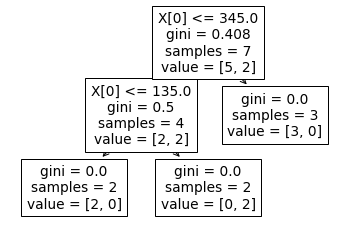

In [38]:
plot_tree(tree)

#Iris 꽃 종류 분류(토이 프로젝트)

In [39]:
from sklearn.datasets import load_iris

iris = load_iris()

In [40]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [41]:
# 독립변수(입력값) 컬럼 종류
feature_names = "feature_names"
print(f"독립변수(입력값): {iris[feature_names]}")

# 종속변수(결과값)의 종류
target_names = "target_names"
print(f"종속변수(결과값): {iris[target_names]}")

독립변수(입력값): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
종속변수(결과값): ['setosa' 'versicolor' 'virginica']


- sepal length (cm): 암술 길이
- sepal width (cm): 암술 넓이
- petal length (cm): 수술 길이
- petal width (cm): 수술 넓이
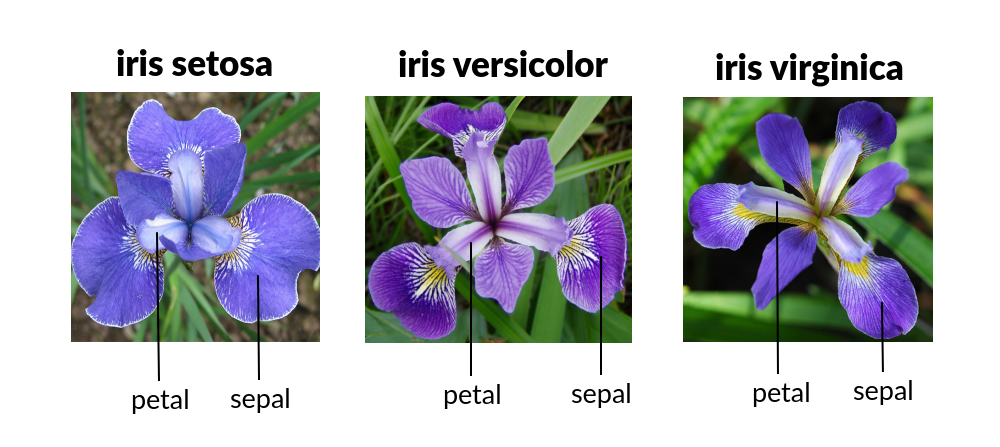

In [42]:
data, target = iris["data"], iris["target"]

In [43]:
pd.DataFrame(data, columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8,  stratify=target)

In [45]:
print("훈련셋 개수:", len(X_train))
print("검증셋 개수:", len(X_test))

훈련셋 개수: 120
검증셋 개수: 30


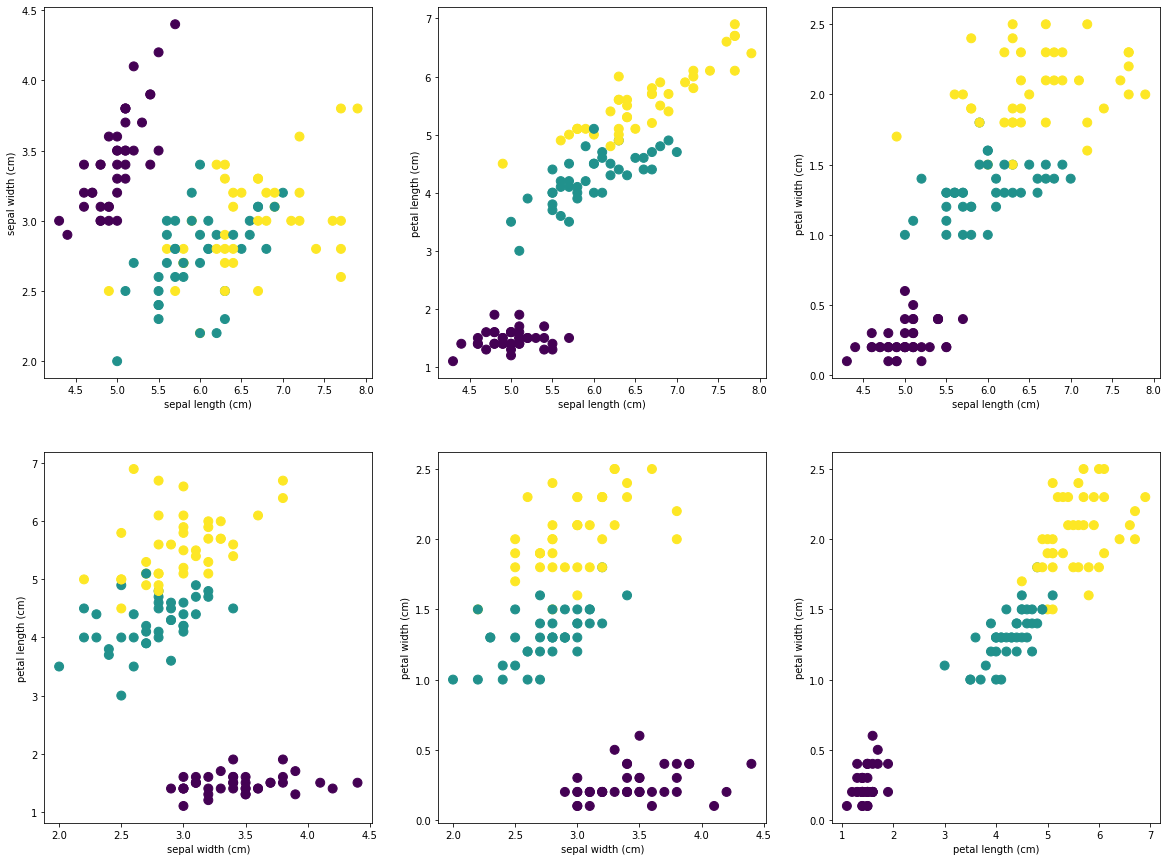

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

pair_combs = [
    [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
]
for idx, pair in enumerate(pair_combs):
    x, y = pair
    ax = axes[idx//3, idx%3]
    ax.scatter( x=X_train[:, x], y=X_train[:, y], c=y_train, s=80 )
    ax.set_xlabel(iris["feature_names"][x])
    ax.set_ylabel(iris["feature_names"][y])

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

gini_tree = DecisionTreeClassifier()
gini_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
print(iris["feature_names"])
print(iris["target_names"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


[Text(0.4, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.5, 0.75, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(0.2, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(0.3, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.4, 0.25, 'sepal length (cm) <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.5, 0.08333333333333333,

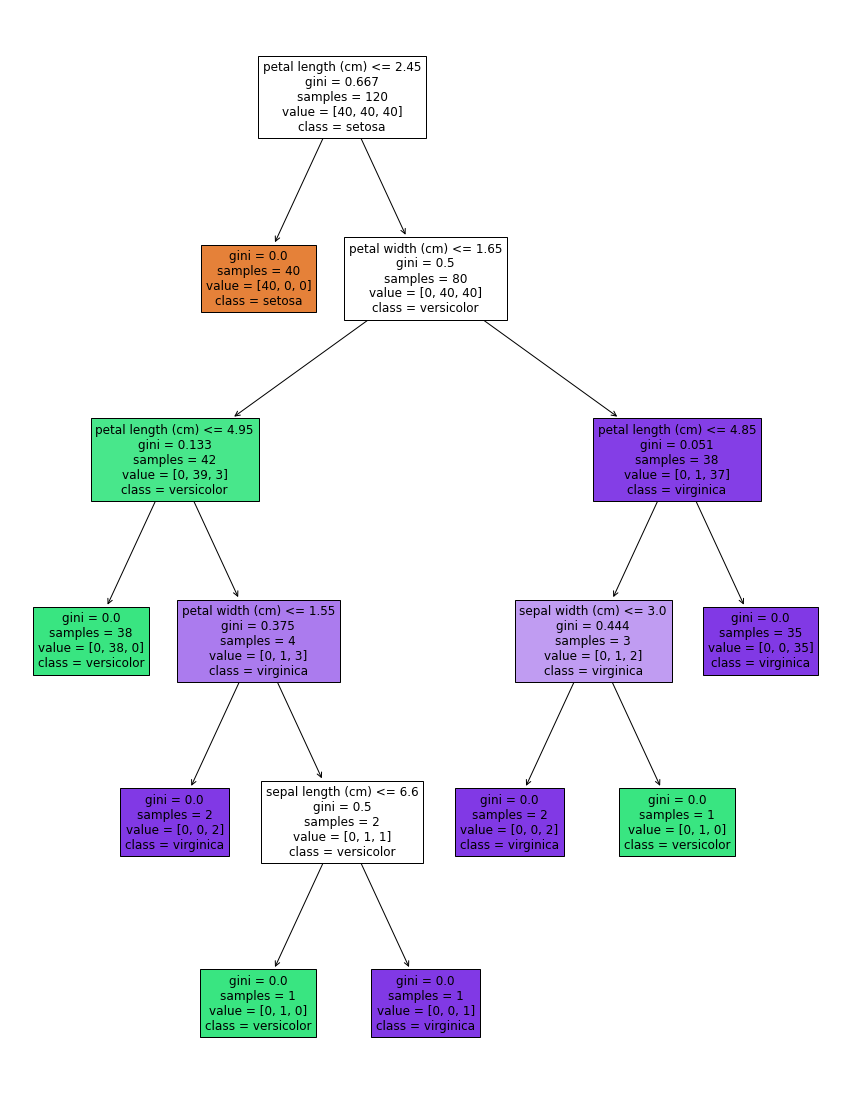

In [49]:
plt.figure(figsize=(15,20))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], filled = True)

## 의사결정나무 모델의 하이퍼 파라미터

[Text(0.5, 0.75, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor')]

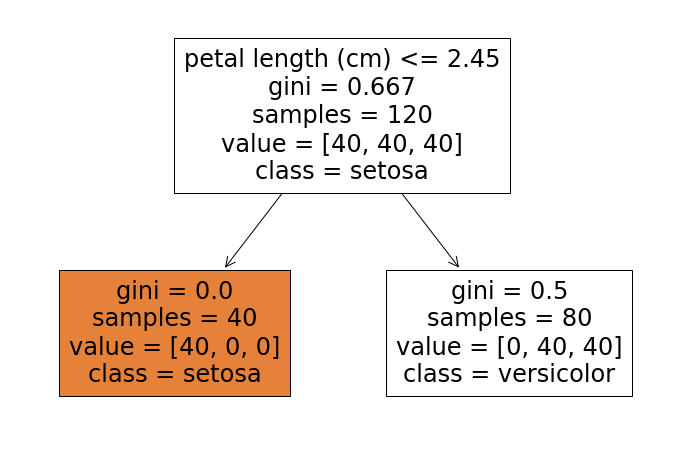

In [59]:
# max_depth: 나무의 최대 깊이를 설정

depth_1_tree = DecisionTreeClassifier(max_depth=1)
depth_1_tree.fit(X_train, y_train)

plt.figure(figsize =(12,8))
plot_tree(depth_1_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], filled = True)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = virginica')]

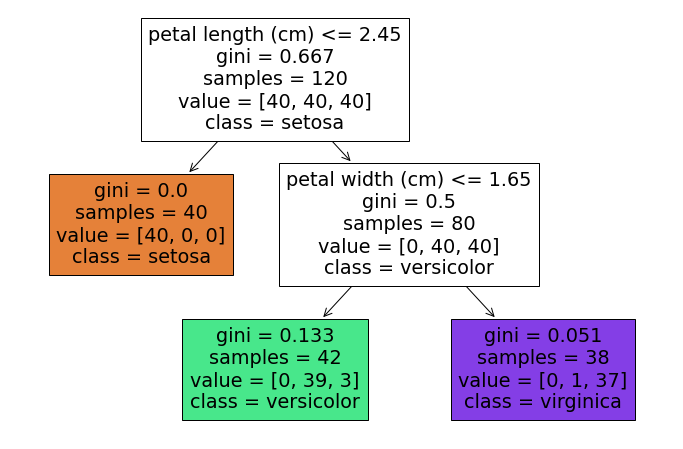

In [51]:
depth_2_tree = DecisionTreeClassifier(max_depth=2)
depth_2_tree.fit(X_train, y_train)

plt.figure(figsize =(12,8))
plot_tree(depth_2_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], filled = True)

[Text(0.375, 0.875, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(0.25, 0.375, 'petal length (cm) <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = virginica')]

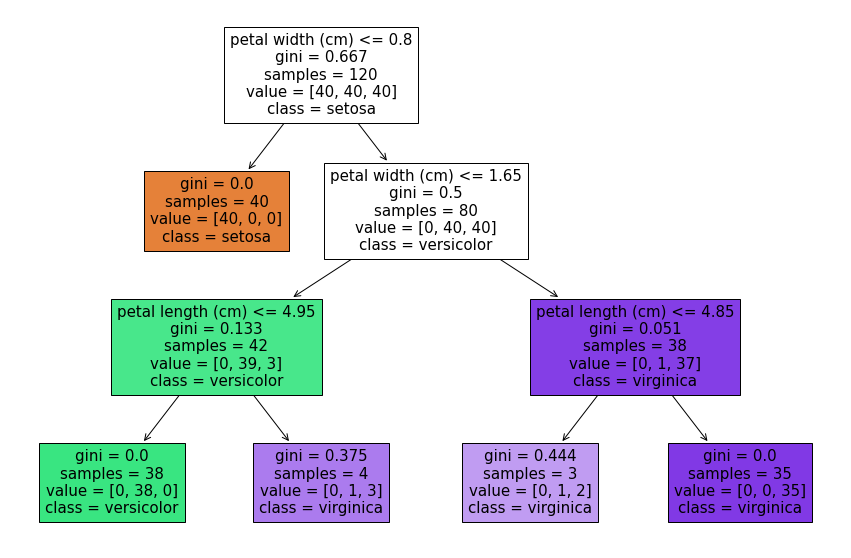

In [54]:
# min_samples_split:노드가 나눠질 수 있는 최소 데이터 개수 설정

sample_50_tree = DecisionTreeClassifier(min_samples_split=20)
sample_50_tree.fit(X_train, y_train)
plt.figure(figsize =(15,10))
plot_tree(sample_50_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], filled = True)

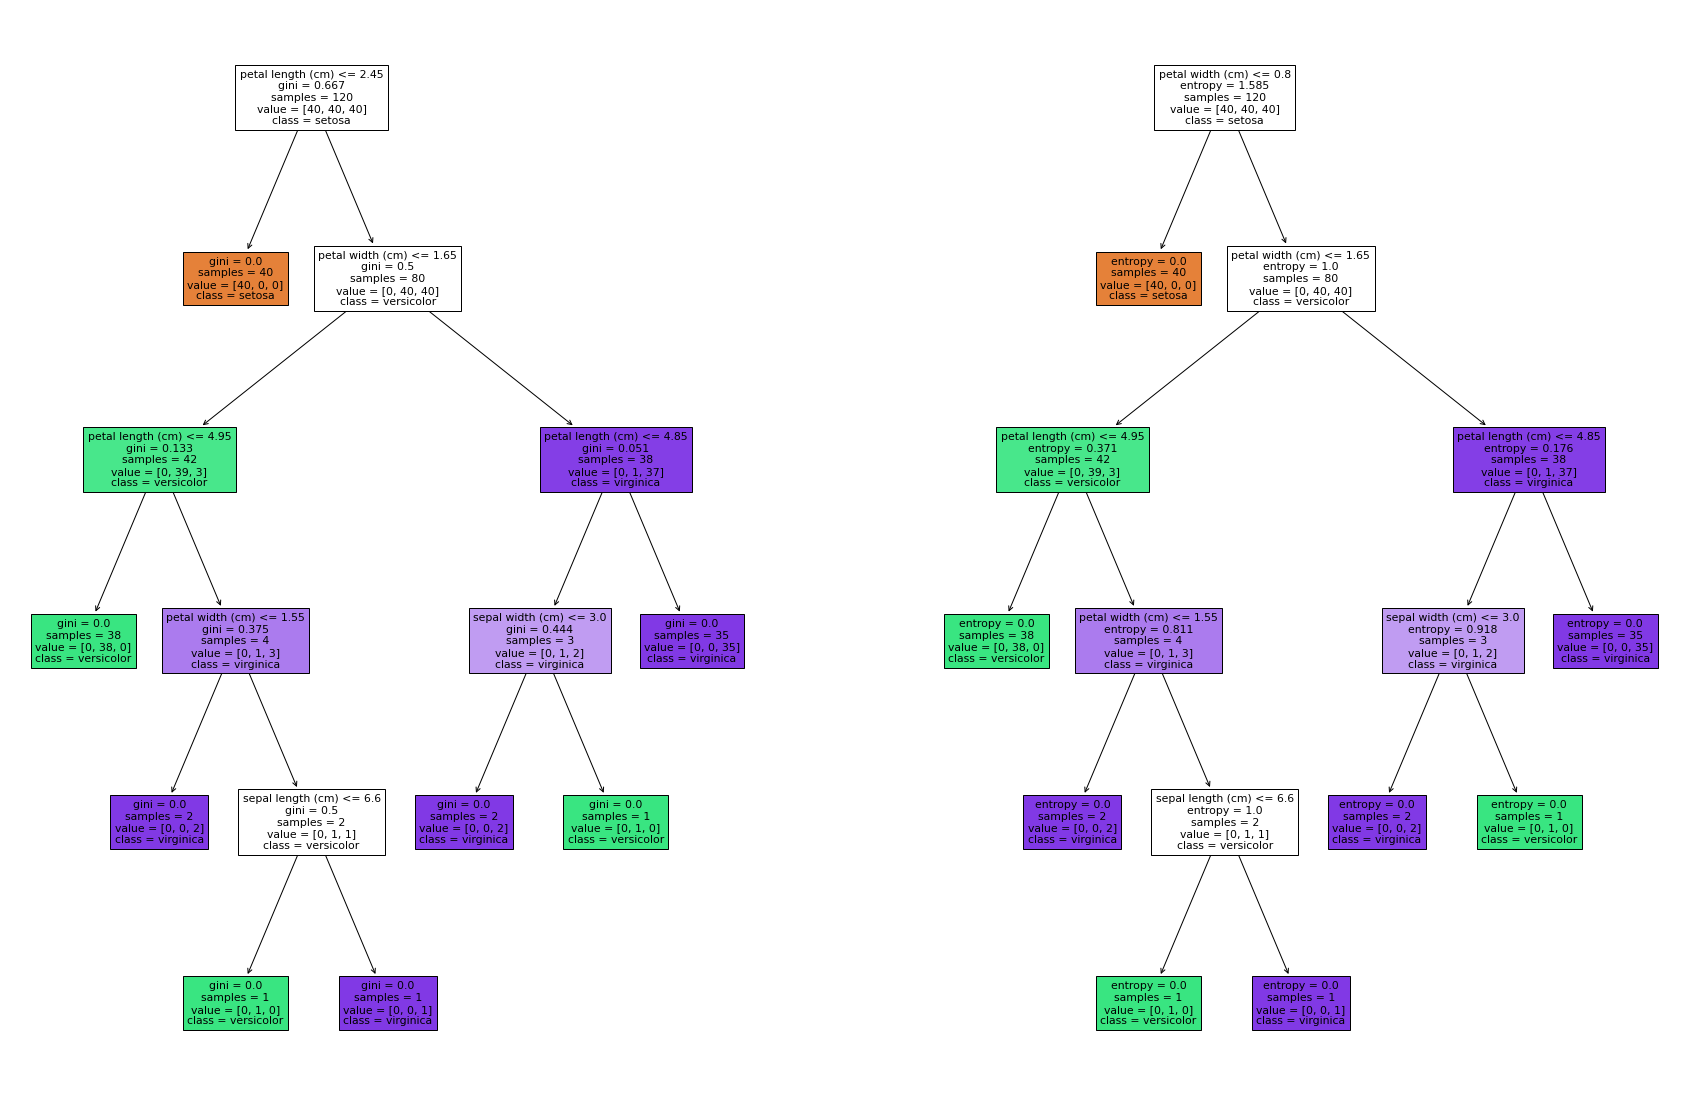

In [55]:
# criterion: 어떤 정보 이득을 기준으로 데이터를 나눌지 정합니다. => 지니 계수: "gini", 엔트로피: "entropy"

entropy_tree = DecisionTreeClassifier(criterion="entropy")
entropy_tree.fit(X_train, y_train)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 20))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=axes[0], filled = True)
plot_tree(entropy_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=axes[1], filled = True)
plt.show()

In [60]:
trees = [
    ("gini tree", gini_tree),
    ("entropy tree", entropy_tree),
    ("depth=1 tree", depth_1_tree),
    ("sample=50 tree" ,sample_50_tree),
]

In [61]:
train_preds = []
test_preds = []
for tree_name, tree in trees:
    train_pred = tree.predict(X_train)
    test_pred =  tree.predict(X_test)
    train_preds += [train_pred]
    test_preds += [test_pred]

In [62]:
train_preds

[array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
        2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
        0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1,
        2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
        1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
        0, 2, 1, 1, 0, 0, 0, 0, 1, 0]),
 array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
        2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
        0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1,
        2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
        1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
        0, 2, 1, 1, 0, 0, 0, 0, 1, 0]),
 array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 

In [63]:
from sklearn.metrics import accuracy_score

for idx, (tree_name, tree) in enumerate(trees):
    train_acc = accuracy_score(y_train, train_preds[idx])
    test_acc =  accuracy_score(y_test, test_preds[idx])
    print(tree_name)
    print("\t", f"train accuracy is {train_acc:.2f}")
    print("\t", f"test accuracy is {test_acc:.2f}")

gini tree
	 train accuracy is 1.00
	 test accuracy is 0.97
entropy tree
	 train accuracy is 1.00
	 test accuracy is 0.97
depth=1 tree
	 train accuracy is 0.67
	 test accuracy is 0.67
sample=50 tree
	 train accuracy is 0.98
	 test accuracy is 0.97


##Feature Importance

In [64]:
gini_feature_importance = pd.Series(gini_tree.feature_importances_, index=iris["feature_names"])

In [65]:
pd.DataFrame(gini_feature_importance, index = iris["feature_names"], columns = ["Feature Importance"])

,Feature Importance
sepal length (cm),0.012500
sepal width (cm),0.016667
petal length (cm),0.558568
petal width (cm),0.412265


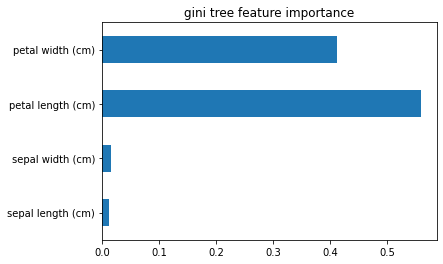

In [66]:
gini_feature_importance.plot(kind="barh", title="gini tree feature importance")

In [67]:
sample_50_feature_importance = pd.Series( sample_50_tree.feature_importances_, index=iris["feature_names"])

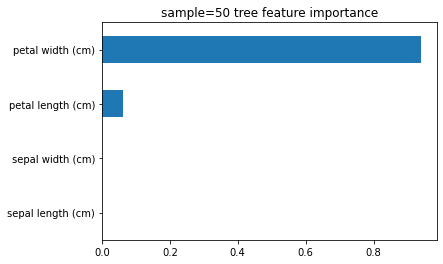

In [68]:
sample_50_feature_importance.plot(kind="barh", title="sample=50 tree feature importance")

## 시각화

In [69]:
def plot_decision_boundary(pair_data, pair_tree, ax):
    x_min, x_max = pair_data[:, 0].min() - 1, pair_data[:, 0].max() + 1
    y_min, y_max = pair_data[:, 1].min() - 1, pair_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = pair_tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn)

    # Plot the training points
    for i, color in zip(range(3), "ryg"):
        idx = np.where(y_train == i)
        ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
                    cmap=plt.cm.RdYlGn, edgecolor='black', s=60)
    return ax

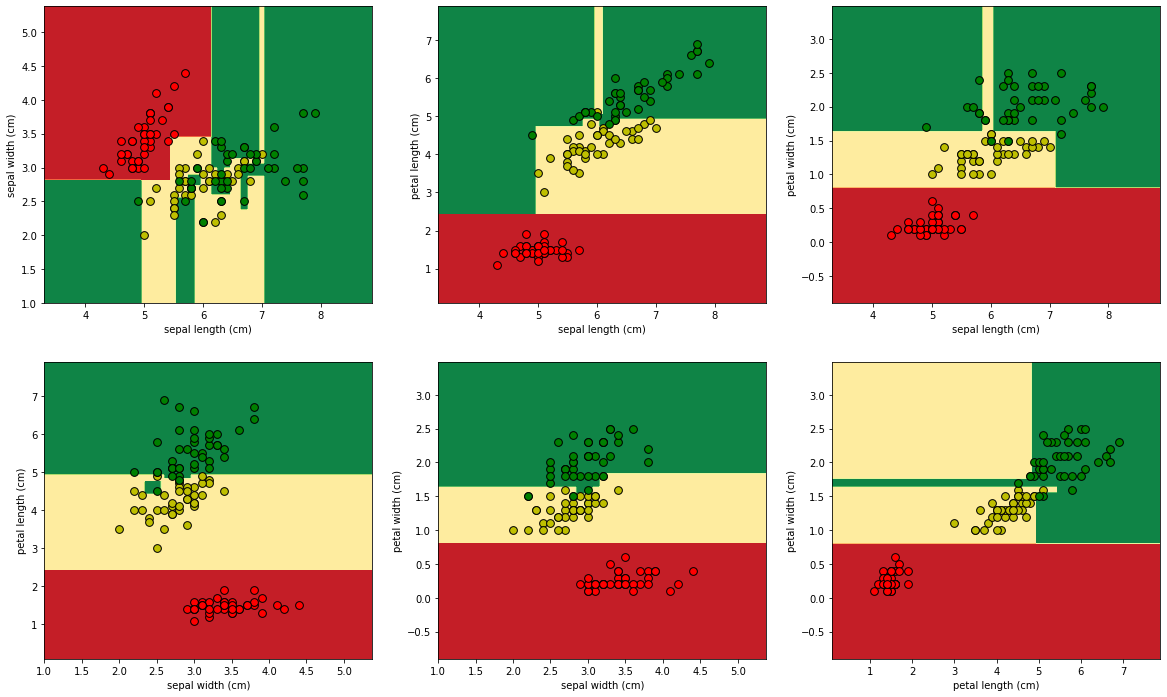

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

for idx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    x, y = pair
    pair_data = X_train[:, pair]
    pair_tree = DecisionTreeClassifier().fit(pair_data, y_train)

    ax = axes[idx//3, idx%3]
    ax = plot_decision_boundary(pair_data, pair_tree, ax)
    ax.set_xlabel(iris["feature_names"][x])
    ax.set_ylabel(iris["feature_names"][y])